In [1]:
import numpy as np
import pandas as pd

import Portfolio_Construction_Module as pc

##  FLAR - Long Term Portfolio Strategy  Base(60-40) - Risk Parity

## Load data

In [2]:

## Flar Indices and Benchmark Return
ind_rets = pd.read_csv("Data\Idex_BMK_Rets.csv",header=0, index_col=0, parse_dates=True)
ind_rets.index = pd.to_datetime(ind_rets.index, format="%Y%m").to_period('M')
Flar_Ret = ind_rets[['bmk_return']]

## Market Indices for long term strategy
prices = pd.read_csv("Data\Data_Long_Term_Portfolios.csv",header=0, index_col=0, parse_dates=True)
prices.index = pd.to_datetime(prices.index, format="%Y%m").to_period('M')
prices.columns = ['Bonds','Stocks','Commodities']




In [3]:
## Asset returns for assets included in Long term Strategy

Assets =['Bonds','Stocks']
rets = prices[Assets].pct_change()
cov = rets.cov()

## Weighting Schemes - Base (60-40)- EW - GMV - Risk Parity

In [4]:
def weight_base(cov, **kwargs):
    return pd.Series([0.4,0.6], index = Assets)

In [5]:
base_w = weight_base(cov)
E_w = pc.weight_ew(rets)
gmv_w = pc.weight_gmv(rets)
ERC_w = pc.equal_risk_contributions(cov)

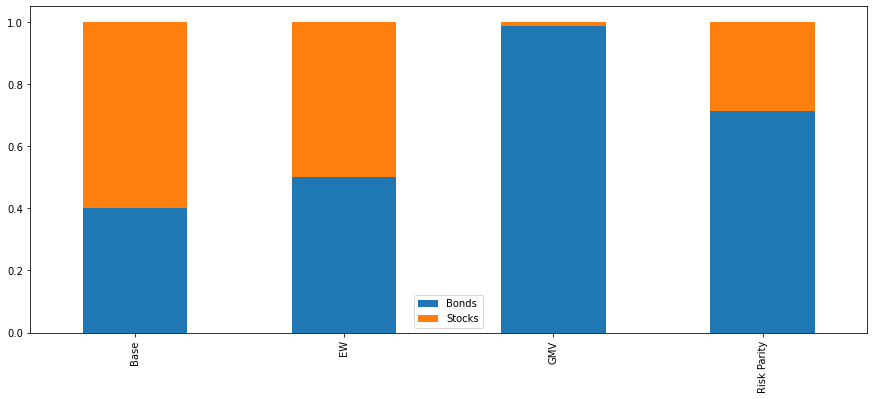

In [6]:
wts = pd.DataFrame({
    "Base": base_w,
    "EW": E_w ,
    "GMV": gmv_w ,
    "Risk Parity": ERC_w,
})
wts.T.plot.bar(stacked=True, figsize=(15,6));


## Risk Contributions in different Weighting Schemes

[Text(0, 0, '0.136939'), Text(0, 0, '0.863061')]

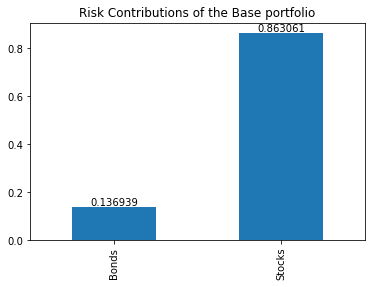

In [7]:
ax = pc.risk_contribution(base_w, cov).plot.bar(title="Risk Contributions of the Base portfolio");
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.215471'), Text(0, 0, '0.784529')]

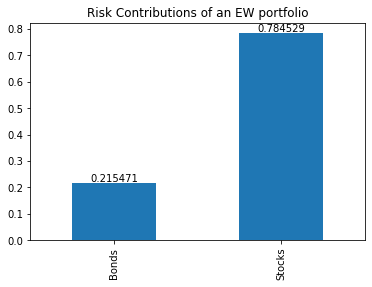

In [8]:
ax = pc.risk_contribution(E_w, cov).plot.bar(title="Risk Contributions of an EW portfolio");
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.988448'), Text(0, 0, '0.0115517')]

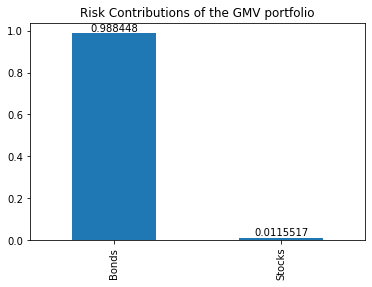

In [9]:
ax = pc.risk_contribution(gmv_w, cov).plot.bar(title="Risk Contributions of the GMV portfolio");
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.499834'), Text(0, 0, '0.500166')]

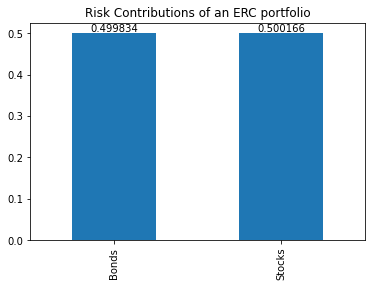

In [10]:
ax = pc.risk_contribution(ERC_w , cov).plot.bar(title="Risk Contributions of an ERC portfolio");
ax.bar_label(ax.containers[0])

## Covariance Matrix Definition and Back tests

## Using Sample Covariance

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Base 60-40,0.048981,0.106816,-0.585486,4.170382,0.050317,0.070648,0.172814,-0.352500
EW,0.044199,0.095105,-0.590994,4.239683,0.044793,0.063631,0.145188,-0.301650
GMV,0.012450,0.061513,-0.499469,4.269455,0.029924,0.041578,-0.277753,-0.241877
Risk Parity,0.028691,0.072528,-0.601688,4.266111,0.034670,0.049440,-0.017661,-0.216614
FLAR BMK,0.021018,0.011967,-0.333462,5.159053,0.004096,0.006623,-0.730515,-0.036706


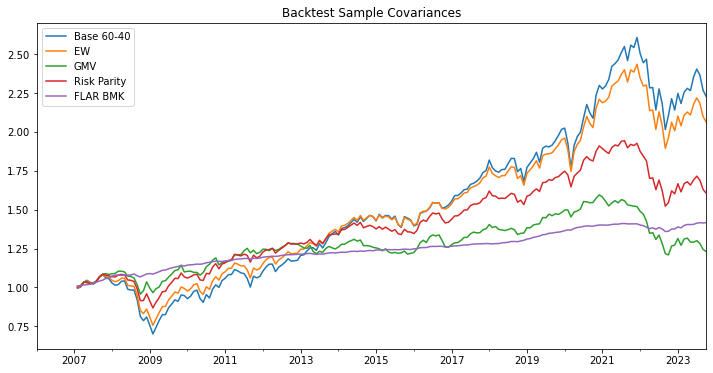

In [11]:
baser = pc.backtest_ws(rets, estimation_window=36, weighting=weight_base, cov_estimator=pc.sample_cov)
ewr = pc.backtest_ws(rets, estimation_window=36, weighting=pc.weight_ew, cov_estimator=pc.sample_cov)
gmv_r = pc.backtest_ws(rets, estimation_window=36, weighting=pc.weight_gmv, cov_estimator=pc.sample_cov)
ERC_r = pc.backtest_ws(rets, estimation_window=36, weighting=pc.weight_erc, cov_estimator=pc.sample_cov)

btr = pd.DataFrame({"Base 60-40": baser['2006-1':'2023-10'], "EW": ewr['2006-1':'2023-10'], "GMV": gmv_r['2006-1':'2023-10'], "Risk Parity": ERC_r['2006-1':'2023-10'], "FLAR BMK":Flar_Ret['bmk_return']['2007-02':]})
(1+btr).cumprod().plot(figsize=(12,6), title="Backtest Sample Covariances")
pc.summary_stats(btr.dropna())

In [ ]:
baser

## Using Shrinkage - Sample-Constant Correlation Model

In [ ]:
baser = pc.backtest_ws(rets, estimation_window=36, weighting=weight_base, cov_estimator=pc.shrinkage_cov, delta=0.50)
ewr = pc.backtest_ws(rets, estimation_window=36, weighting=pc.weight_ew, cov_estimator=pc.shrinkage_cov, delta=0.50)
gmv_r = pc.backtest_ws(rets, estimation_window=36, weighting=pc.weight_gmv, cov_estimator=pc.shrinkage_cov, delta=0.50)
ERC_r = pc.backtest_ws(rets, estimation_window=36, weighting=pc.weight_erc, cov_estimator=pc.shrinkage_cov, delta=0.50)

btr = pd.DataFrame({"Base": baser, "EW": ewr, "GMV": gmv_r, "Risk Parity": ERC_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Backtest Shrinkage Covariances")
pc.summary_stats(btr.dropna())